Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
df=pd.read_csv('structures.csv')
df.head()

molecule_name  atom_index atom         x         y         z
0  dsgdb9nsd_000001           0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001           1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001           2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001           3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001           4    H -0.523814  1.437933  0.906397

In [3]:
df.shape

(2358875, 6)

In [4]:
df.columns

Index(['molecule_name', 'atom_index', 'atom', 'x', 'y', 'z'], dtype='object')

In [5]:
molecules = df['molecule_name'].unique()
sample_data=molecules[:5]
print(len(molecules))

130789


### 2D Scatter Plots of Coordinate Pairs

Explore the relationships between different pairs of coordinates (X, Y), (Y, Z), and (Z, X) within molecule structures. Each subplot visualizes the distribution of points in two-dimensional space, providing insights into the arrangement of atoms within the molecules.

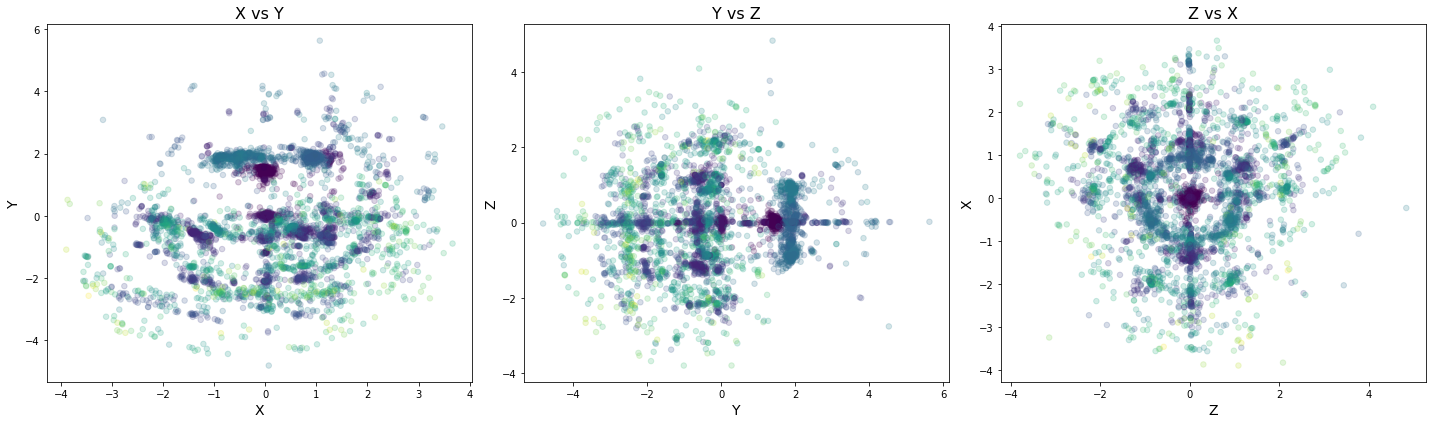

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
N=5000
axes[0].scatter(df['x'].values[:N], df['y'].values[:N], c=df['atom_index'].values[:N], s=30, alpha=0.2)
axes[0].set_xlabel('X', fontsize=14)
axes[0].set_ylabel('Y', fontsize=14)
axes[0].set_title('X vs Y', fontsize=16)

axes[1].scatter(df['y'].values[:N], df['z'].values[:N], c=df['atom_index'].values[:N], s=30, alpha=0.2)
axes[1].set_xlabel('Y', fontsize=14)
axes[1].set_ylabel('Z', fontsize=14)
axes[1].set_title('Y vs Z', fontsize=16)

axes[2].scatter(df['z'].values[:N], df['x'].values[:N], c=df['atom_index'].values[:N], s=30, alpha=0.2)
axes[2].set_xlabel('Z', fontsize=14)
axes[2].set_ylabel('X', fontsize=14)
axes[2].set_title('Z vs X', fontsize=16)

plt.tight_layout()
plt.show()

### Load Training Dataset

In [12]:
train_df=pd.read_csv('train.csv')
train_df.head()

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   

   scalar_coupling_constant  
0                   84.8076  
1                  -11.2570  
2                  -11.2548  
3                  -11.2543  
4                   84.8074

In [13]:
train_df['type'].unique()

array(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'],
      dtype=object)

In [14]:
train_df[train_df['molecule_name']=='dsgdb9nsd_133791']

id     molecule_name  atom_index_0  atom_index_1  type  \
4656964  4656964  dsgdb9nsd_133791             9             0  1JHC   
4656965  4656965  dsgdb9nsd_133791             9             1  2JHN   
4656966  4656966  dsgdb9nsd_133791             9             2  3JHC   
4656967  4656967  dsgdb9nsd_133791             9            10  2JHH   
4656968  4656968  dsgdb9nsd_133791             9            11  2JHH   
4656969  4656969  dsgdb9nsd_133791             9            12  3JHH   
4656970  4656970  dsgdb9nsd_133791            10             0  1JHC   
4656971  4656971  dsgdb9nsd_133791            10             1  2JHN   
4656972  4656972  dsgdb9nsd_133791            10             2  3JHC   
4656973  4656973  dsgdb9nsd_133791            10            11  2JHH   
4656974  4656974  dsgdb9nsd_133791            10            12  3JHH   
4656975  4656975  dsgdb9nsd_133791            11             0  1JHC   
4656976  4656976  dsgdb9nsd_133791            11             1  2JHN   
4656977  4656977  dsgdb9nsd_133791            11             2  3JHC   
4656978  4656978  dsgdb9nsd_133791            11            12  3JHH   
4656979  4656979  dsgdb9nsd_133791            12             0  2JHC   
4656980  4656980  dsgdb9nsd_133791            12             1  1JHN   
4656981  4656981  dsgdb9nsd_133791            12             2  2JHC   
4656982  4656982  dsgdb9nsd_133791            12             3  3JHC   
4656983  4656983  dsgdb9nsd_133791            12            13  3JHH   
4656984  4656984  dsgdb9nsd_133791            12            14  3JHH   
4656985  4656985  dsgdb9nsd_133791            13             0  3JHC   
4656986  4656986  dsgdb9nsd_133791            13             1  2JHN   
4656987  4656987  dsgdb9nsd_133791            13             2  1JHC   
4656988  4656988  dsgdb9nsd_133791            13             3  2JHC   
4656989  4656989  dsgdb9nsd_133791            13             5  3JHC   
4656990  4656990  dsgdb9nsd_133791            13            14  2JHH   
4656991  4656991  dsgdb9nsd_133791            14             0  3JHC   
4656992  4656992  dsgdb9nsd_133791            14             1  2JHN   
4656993  4656993  dsgdb9nsd_133791            14             2  1JHC   
4656994  4656994  dsgdb9nsd_133791            14             3  2JHC   
4656995  4656995  dsgdb9nsd_133791            14             5  3JHC   

         scalar_coupling_constant  
4656964                 89.284200  
4656965                 -0.094300  
4656966                  2.594360  
4656967                 -8.363710  
4656968                 -9.850870  
4656969                  1.180560  
4656970                 90.050200  
4656971                  2.188290  
4656972                  1.897850  
4656973                -12.900900  
4656974                 11.741200  
4656975                 83.929700  
4656976                  2.195010  
4656977                 11.252000  
4656978                  2.916280  
4656979                  0.114074  
4656980                 42.184400  
4656981                 -0.398997  
4656982                  2.913770  
4656983                  0.832829  
4656984                 11.887200  
4656985                  9.042980  
4656986                  2.963110  
4656987                 83.034200  
4656988                 -0.415871  
4656989                 -0.729325  
4656990                -17.675600  
4656991                  4.096350  
4656992                  1.452470  
4656993                 95.633100  
4656994                 -0.178789  
4656995                 -0.225104

#### Molecular Geometry Standardization

This code snippet defines a function `standardizer` that standardizes the molecular geometry by transforming the coordinates of the atoms in a molecule. This standardization helps in creating a consistent representation of molecules..

The `standardizer` function processes molecular data by centering the coordinates on a reference atom, normalizing by the bond distance, and applying rotations to achieve a standardized orientation. 

It extracts the atom types and coordinates for a given molecule, normalizes and rotates these coordinates to a consistent frame, and calculates the distances and types of the nearest neighboring atoms. 

This standardization facilitates consistent feature extraction for machine learning models, enabling accurate predictions of scalar coupling constants..

In [33]:
np_xyz = df[['x','y','z']].values.astype('float32')
mp = {'H':0,'C':1,'O':2,'N':3,'F':4}
np_atoms = df['atom'].map(mp).values.astype('int8')
ss = df.groupby('molecule_name').size()
ss = ss.cumsum()
ssx = np.zeros(len(ss) + 1, 'int')
ssx[1:] = ss; ssx[0] = 0
np_dict = {}
for k in range(len(ss)):
    np_dict[ss.index[k]] = k

def standardizer(mol_name, t1, t2, phi2=0, a_count=0):
    atom_df = np_atoms[ ssx[np_dict[mol_name]]:ssx[np_dict[mol_name]+1] ]
    mol_df = np_xyz[ ssx[np_dict[mol_name]]:ssx[np_dict[mol_name]+1], ].copy()
    mol_df -= mol_df[t1,]
    bond_dist = np.sqrt(mol_df[t2,].dot(mol_df[t2,])).astype('float32')
    mol_df /= bond_dist
    
    if mol_df[t2,0]==0: theta = np.sign(mol_df[t2,2])*np.pi/2
    else: theta = np.arctan(mol_df[t2,2]/mol_df[t2,0])
    M = np.array([[np.cos(-theta),-np.sin(-theta)],[np.sin(-theta),np.cos(-theta)]])
    mol_df[:,[0,2]] = (M.dot(mol_df[:,[0,2]].T)).T    
    
    if mol_df[t2,0]==0: phi = np.sign(mol_df[t2,1])*np.pi/2
    else: phi = np.arctan(mol_df[t2,1]/mol_df[t2,0])
    if mol_df[t2,0] < 0: phi += np.pi
    M = np.array([[np.cos(-phi),-np.sin(-phi)],[np.sin(-phi),np.cos(-phi)]])
    mol_df[:,[0,1]] = (M.dot(mol_df[:,[0,1]].T)).T         
      
    M = np.array([[np.cos(-phi2),-np.sin(-phi2)],[np.sin(-phi2),np.cos(-phi2)]])
    mol_df[:,[1,2]] = (M.dot(mol_df[:,[1,2]].T)).T 
            
    neighbor_types = [np.nan]*a_count
    neighbor_dists = [np.nan]*a_count
    if a_count>0:
        dst = np.sum( (mol_df-[1,0,0])*(mol_df-[1,0,0]), axis=1 )
        dst[t1] = 1e3; dst[t2] = 1e3
        idst = np.argsort(dst)
        ln = np.min((len(idst)-2,a_count))
        neighbor_types[:ln] = atom_df[idst[:ln]]
        neighbor_dists[:ln] = dst[idst[:ln]]
        
    return (atom_df, mol_df, bond_dist, neighbor_types, neighbor_dists)

The `plot` function visualizes molecular structures with atoms represented as markers and bonds between them as lines. It takes the index of a molecule (`ind`) from the dataset and an optional parameter to display bonds (`display_bonds`). 

The function standardizes the molecule's geometry and adjusts the scale based on the bond type. It then iterates over 16 frames, each representing a rotation of the molecule, and creates traces for atoms and bonds. 

Atoms are color-coded based on their types (H-🟣, C-⚫, O-🔴, N-🔵, F-🟢) and their count in the molecule. 

The resulting 3D plot is interactive and shows the molecule from different angles. The function is called iteratively to visualize a random selection of molecules.

In [35]:
def plot(ind,display_bonds=True):
    atoms = ['H', 'C', 'O', 'N', 'F']
    colors = ['purple', 'black', 'red', 'blue', 'green']
    sizes = [2, 6, 5, 4, 3]
    
    mol_name = train_df.loc[ind, 'molecule_name']
    atom1 = train_df.loc[ind, 'atom_index_0']
    atom2 = train_df.loc[ind, 'atom_index_1']
    btype = train_df.loc[ind, 'type']
    frames = []
    scl = 1.0
    traces=[]
    for x, _ in enumerate(np.linspace(0, 2 * np.pi, 16)):
        atom_df, mol_df, dis, _, _ = standardizer(mol_name, atom1, atom2)
        if x == 0:
            mxx = np.sqrt(np.max(mol_df[:, 1]**2 + mol_df[:, 2]**2))
            if btype[0] == '2':
                mxx *= 1.5
            elif btype[0] == '3':
                mxx *= 2.0
            if mxx < 0.1:
                scl = 100
            else:
                scl = 87. * (1 + 0.2 * (4 - mxx)) / mxx
            if display_bonds:
                scl= 4
                
        all = []
        if display_bonds:
            ds = mol_df[:, None, :] - mol_df
            dist = np.sqrt(np.einsum('ijk,ijk->ij', ds, ds))
            dist = (dist < 1.65 / dis).astype(np.int8)
            for k in range(len(mol_df)):
                for kk in range(k + 1, len(mol_df)):
                    if dist[k, kk] == 1:
                        x_values = [mol_df[k, 0], mol_df[kk, 0], None]
                        y_values = [mol_df[k, 1], mol_df[kk, 1], None]
                        z_values = [mol_df[k, 2], mol_df[kk, 2], None]
                        pp = go.Scatter3d(x=x_values, y=y_values, z=z_values, mode='lines', line=dict(color='black'), showlegend=False)
                        all.append(pp)
                        
        mol_df = np.concatenate([mol_df, atom_df.reshape((-1, 1))], axis=1)
        midx = np.argsort(mol_df[:, 2], axis=0)
        mol_df = mol_df[midx, ]
        atom_df = mol_df[:, 3].astype('int8')
        atom_count={}
        for k in range(len(mol_df)):
            atom = atoms[atom_df[k]]
            atom_count[atom]=atom_count.get(atom,0)+1
            size = scl * sizes[atom_df[k]]
            marker = dict(size=size, color=colors[atom_df[k]], opacity=0.8)
            trace = go.Scatter3d(x=[mol_df[k, 0]], y=[mol_df[k, 1]], z=[mol_df[k, 2]], mode='markers', marker=marker, name=atom+str(atom_count[atom]))
            all.append(trace)
        frames.append(all)
    traces.append(trace)
    print(atom_count)
    fig = go.Figure(data=frames[0])
    
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        )
    )
    
    frames_data = [go.Frame(data=frame) for frame in frames]
    fig.frames = frames_data
    title=f'Molecle Name - {mol_name}'
    fig.update_layout(title=title)
    fig.show()

for i in range(10):   
    rand_idx=random.randint(0,len(molecules))
    plot(rand_idx)


{'H': 7, 'C': 5, 'N': 1, 'O': 1}


{'H': 7, 'O': 1, 'C': 4, 'N': 3}


{'H': 9, 'C': 5, 'O': 2, 'N': 1}


{'H': 4, 'N': 2, 'C': 3, 'O': 3}


{'H': 7, 'N': 1, 'C': 5, 'O': 1}


{'H': 8, 'C': 6}


{'H': 9, 'C': 5, 'O': 1, 'N': 1}


{'H': 6, 'C': 4, 'O': 3}


{'H': 8, 'C': 5, 'O': 2}


{'H': 7, 'O': 1, 'C': 5, 'N': 1}


#### Histogram of Unique Atom Counts in each Molecule

The code computes the distribution of unique atom counts in molecules and presents it through a histogram, offering insights into the variability of molecular compositions.

In [36]:
unique_df=df.groupby('molecule_name')['atom'].nunique().reset_index()

unique_df.columns = ['molecule_name', 'count']

fig = px.histogram(unique_df, x='count', nbins=6, title='Histogram of Unique Atom Counts in Molecules')

fig.update_layout(
    xaxis_title='Unique Atom Count',
    yaxis_title='Frequency',
    bargap=0.5, 
    width=800,
    height=600
)

fig.show()


### Scalar Coupling Constant

The scalar coupling constant represents the strength of the magnetic interaction between two atoms in a molecule. It arises from the coupling between the nuclear spins of these atoms, leading to a splitting of energy levels in nuclear magnetic resonance (NMR) spectroscopy. 

### Feature Extraction
The code randomly samples 50,000 rows from the `train_df` DataFrame, then iterates through each sample to compute bond distances, neighboring atom types, and distances. These features are concatenated into an array `X`, while the corresponding scalar coupling constants are stored in array `y`.

In [18]:
sample_df = train_df.sample(n=50000, random_state=42)
bond_dists = np.zeros((len(sample_df), 1))
neighbor_types = np.zeros((len(sample_df), 4))
neighbor_dists = np.zeros((len(sample_df), 4))
bond_names = []

for i, k in enumerate(tqdm(sample_df.index, desc="Processing")):
#     print(k)
    bond_names.append(k)
    _, _, a, b, c = standardizer(
        train_df.molecule_name[k], 
        train_df.atom_index_0[k], 
        train_df.atom_index_1[k], 
        a_count=4
    )
    bond_dists[i] = a
    neighbor_types[i, :] = b
    neighbor_dists[i, :] = c

X = np.concatenate([bond_dists, neighbor_types, neighbor_dists], axis=1)
y = sample_df['scalar_coupling_constant'].values
data = np.concatenate([X, y.reshape(-1, 1)], axis=1)
columns = [f'feature_{i+1}' for i in range(X.shape[1])] + ['scalar_coupling_constant']
bond_df = pd.DataFrame(data, columns=columns)
bond_df.to_csv('bond_lengths.csv', index=False)

Processing: 100%|██████████████████████████████████████████████████████████████| 50000/50000 [00:30<00:00, 1640.18it/s]


For each sample, it standardizes the molecular structure using the standardizer function, extracting bond distances (a), neighboring atom types (b), and distances (c). These features are then concatenated into an array X.

This feature extraction process aims to capture essential molecular features related to bond distances and neighboring atoms, which can help in predicting scalar coupling constants accurately.

In [64]:
bond_df=pd.read_csv('bond_lengths.csv')
bond_df.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   2.698469        0.0        1.0        3.0        1.0   0.160881   
1   2.216625        3.0        1.0        1.0        1.0   0.433716   
2   2.171630        3.0        1.0        1.0        1.0   0.458773   
3   1.108998        2.0        1.0        0.0        1.0   1.176351   
4   2.157284        0.0        0.0        2.0        1.0   0.256646   

   feature_7  feature_8  feature_9  scalar_coupling_constant  
0   0.297002   0.313543   0.327659                  0.327952  
1   0.457616   0.462435   0.491205                 -1.189010  
2   0.460827   0.501887   0.515226                 -1.724910  
3   1.890627   3.629743   5.012600                125.406000  
4   0.261427   0.434588   0.505627                 -2.638650

In [65]:
bond_df.isna().sum()

feature_1                   0
feature_2                   0
feature_3                   0
feature_4                   0
feature_5                   1
feature_6                   0
feature_7                   0
feature_8                   0
feature_9                   1
scalar_coupling_constant    0
dtype: int64

In [66]:
bond_df1=bond_df.dropna()
bond_df1.shape

(49999, 10)

In [67]:
X=bond_df1.drop(columns=['scalar_coupling_constant'])
y=bond_df1['scalar_coupling_constant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape,X_test.shape

((39999, 9), (10000, 9))

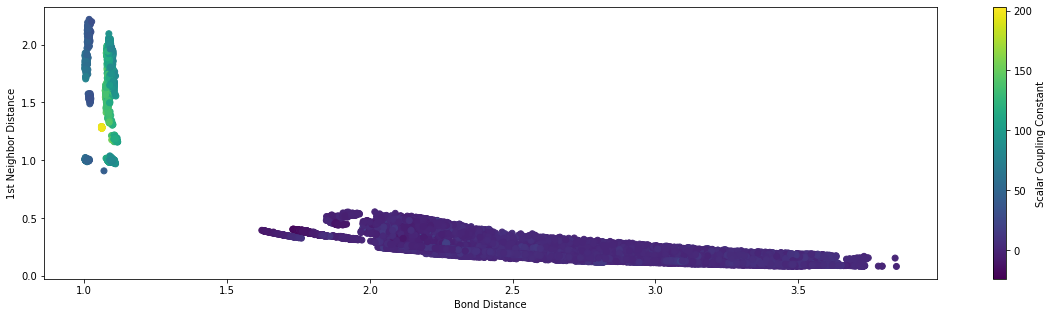

In [69]:
plt.figure(figsize=(20, 5))
scatter = plt.scatter(x=X['feature_1'], y=X['feature_6'], c=y, cmap='viridis')
plt.colorbar(scatter, label='Scalar Coupling Constant')
plt.xlabel('Bond Distance')
plt.ylabel('1st Neighbor Distance')
plt.show()

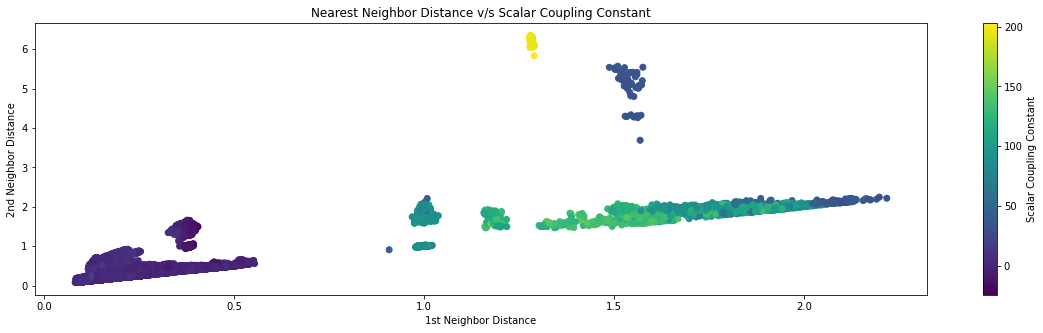

In [70]:
plt.figure(figsize=(20, 5))
scatter = plt.scatter(x=X['feature_6'], y=X['feature_7'], c=y, cmap='viridis')
plt.colorbar(scatter, label='Scalar Coupling Constant')
plt.title("Nearest Neighbor Distance v/s Scalar Coupling Constant")
plt.xlabel('1st Neighbor Distance')
plt.ylabel('2nd Neighbor Distance')
plt.show()

### Model Training and Evaluation

The code defines a function `evaluate_model` to assess regression models' performance, including Linear Regression, Random Forest Regressor, K Nearest Neighbors, Support Vector Regressor, and Decision Tree Regressor, by calculating MAE, MSE, and R^2 Score, and stores the results in a dictionary.

In [26]:
results = {}

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    print(f"{model_name}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print('\n')

evaluate_model(LinearRegression(), 'Linear Regressor')

evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest Regressor')

evaluate_model(KNeighborsRegressor(n_neighbors=5), 'K Nearest Neighbors')

evaluate_model(SVR(kernel='linear'), 'Support Vector Regressor')

evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree Regressor')

Linear Regressor
Mean Absolute Error (MAE): 8.609905393621098
Mean Squared Error (MSE): 176.9550298728218
R^2 Score: 0.853611472508039


Random Forest Regressor
Mean Absolute Error (MAE): 1.6670128576739998
Mean Squared Error (MSE): 8.010648885056257
R^2 Score: 0.9933730784856395


K Nearest Neighbors
Mean Absolute Error (MAE): 2.1068519679400004
Mean Squared Error (MSE): 17.14773563060988
R^2 Score: 0.9858142954704903


Support Vector Regressor
Mean Absolute Error (MAE): 8.080887515971929
Mean Squared Error (MSE): 193.65974810904962
R^2 Score: 0.8397922603244296


Decision Tree Regressor
Mean Absolute Error (MAE): 2.1841845886000004
Mean Squared Error (MSE): 15.00225044799627
R^2 Score: 0.9875891781447175




In [27]:
for i in list(results.items()):
    print(i)

('Linear Regressor', {'MAE': 8.609905393621098, 'MSE': 176.9550298728218, 'R2': 0.853611472508039})
('Random Forest Regressor', {'MAE': 1.6670128576739998, 'MSE': 8.010648885056257, 'R2': 0.9933730784856395})
('K Nearest Neighbors', {'MAE': 2.1068519679400004, 'MSE': 17.14773563060988, 'R2': 0.9858142954704903})
('Support Vector Regressor', {'MAE': 8.080887515971929, 'MSE': 193.65974810904962, 'R2': 0.8397922603244296})
('Decision Tree Regressor', {'MAE': 2.1841845886000004, 'MSE': 15.00225044799627, 'R2': 0.9875891781447175})


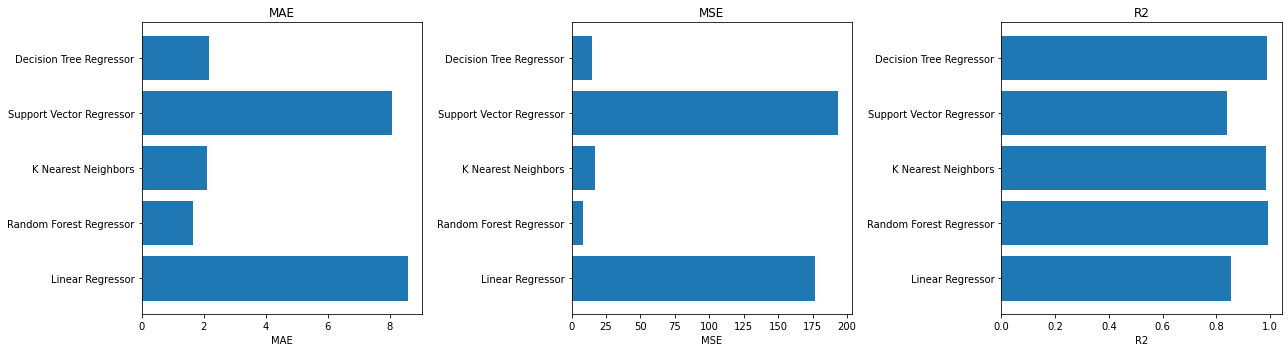

In [28]:
metrics = ['MAE', 'MSE', 'R2']
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(metrics):
    model_names = list(results.keys())
    values = [results[model][metric] for model in model_names]
    ax[idx].barh(model_names, values)
    ax[idx].set_title(metric)
    ax[idx].set_xlabel(metric)

plt.tight_layout()
plt.show()

In [29]:
x = list(results.keys())
mae, mse, r2 = [], [], []
colors = ['blue', 'green', 'red']
for i in list(results.values()):
    mae.append(i['MAE'])
    mse.append(i['MSE'])
    r2.append(i['R2'])

In [30]:
fig_mae = go.Figure()
fig_mae = go.Figure(go.Scatter(x=x, y=mae, mode='lines+markers', name='Mean Absolute Error', line=dict(color=colors[0])))
fig_mae.update_layout(
    title='Mean Absolute Error',
    xaxis_title='Models',
    yaxis_title='MAE Score',
    template='plotly_dark'
)
fig_mae.show()

In [31]:
fig_mse = go.Figure()
fig_mse.add_trace(go.Scatter(x=x, y=mse, mode='lines+markers', name='Mean Square Error',line=dict(color=colors[1])))
fig_mse.update_layout(
    title='Mean Square Error',
    xaxis_title='Models',
    yaxis_title='MSE Score',
    template='plotly_dark'
)
fig_mse.show()

In [32]:
fig_r2 = go.Figure()
fig_r2.add_trace(go.Scatter(x=x, y=r2, mode='lines+markers', name='R2 Score',line=dict(color=colors[2])))
fig_r2.update_layout(
    title='R2 Score',
    xaxis_title='Models',
    yaxis_title='R2 Score',
    template='plotly_dark'
)
fig_r2.show()

### Prediction using Random Forest Regressor

In [71]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X,y)
pred=rf.predict(X)

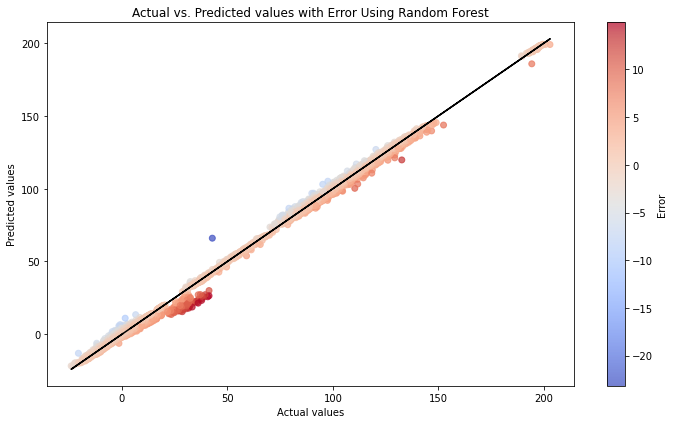

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y, pred,c=y-pred, cmap='coolwarm', alpha=0.7)
plt.plot(y,y, color='black', linestyle='-')
cbar=plt.colorbar()
cbar.set_label('Error')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values with Error Using Random Forest')
plt.tight_layout()
plt.show()

In [83]:
results_df = pd.DataFrame({
    'actual_values': y,
    'predicted_values': pred,
    'err':y-pred
})
results_df.to_csv('predictions.csv',index=False)
results_df.head()

actual_values  predicted_values       err
0       0.327952          0.973773 -0.645821
1      -1.189010         -1.262454  0.073444
2      -1.724910         -1.232855 -0.492055
3     125.406000        123.026650  2.379350
4      -2.638650         -2.300235 -0.338415

## Conclusion

- Random Forest Regressor stands out as the best performer among the considered models. It exhibits the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) values, coupled with the highest R-squared (R²) value. This indicates that the Random Forest Regressor provides the most accurate predictions and explains the variance in the data exceptionally well.

- Decision Tree Regressor and K Nearest Neighbors also demonstrate competitive performance, showing relatively low MAE and MSE values and high R² values. While they perform well, they do not match the level of accuracy achieved by the Random Forest Regressor.

- Linear Regressor and Support Vector Regressor exhibit noticeably higher MAE and MSE values, along with lower R² values compared to the other models. This indicates that they are less suitable for accurately predicting the target variable in this context.

### Additional Work

Apart from various ML regressors, created a simple Neural Network Model to predict the `scalar_coupling_cnstant`.


In [37]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50
500/500 [==============================] - 6s 7ms/step - loss: 470.9916 - val_loss: 126.4749
Epoch 2/50
500/500 [==============================] - 3s 7ms/step - loss: 150.8214 - val_loss: 103.4063
Epoch 3/50
500/500 [==============================] - 3s 6ms/step - loss: 139.0209 - val_loss: 94.8205
Epoch 4/50
500/500 [==============================] - 3s 6ms/step - loss: 130.7181 - val_loss: 87.9208
Epoch 5/50
500/500 [==============================] - 3s 7ms/step - loss: 123.7516 - val_loss: 81.1808
Epoch 6/50
500/500 [==============================] - 3s 7ms/step - loss: 115.9619 - val_loss: 76.2446
Epoch 7/50
500/500 [==============================] - 4s 7ms/step - loss: 114.7541 - val_loss: 70.3390
Epoch 8/50
500/500 [==============================] - 4s 7ms/step - loss: 105.5912 - val_loss: 64.7075
Epoch 9/50
500/500 [==============================] - 3s 7ms/step - loss: 101.6051 - val_loss: 59.5346
Epoch 10/50
500/500 [==============================] - 4s 7ms/step - lo

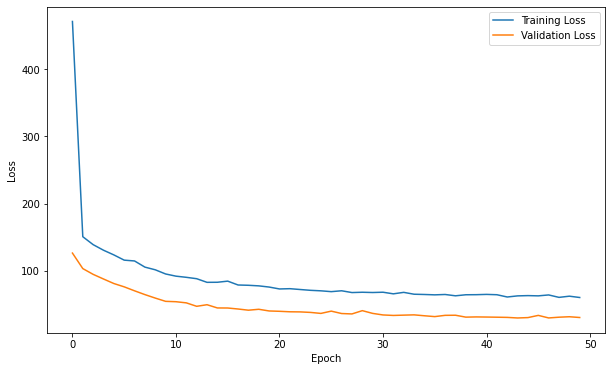

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [59]:
y_pred = model.predict(X)

1563/1563 [==============================] - 6s 4ms/step


In [60]:
y_pred=y_pred.reshape(-1)
y_pred.shape

(49999,)

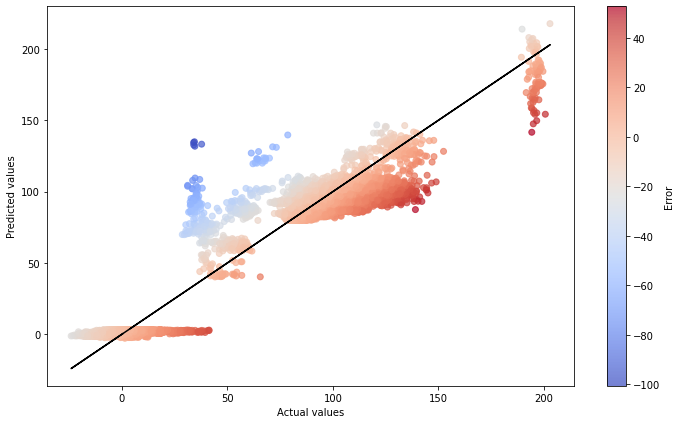

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred,c=y-y_pred, cmap='coolwarm', alpha=0.7)
plt.plot(y,y, color='black', linestyle='-')
cbar=plt.colorbar()
cbar.set_label('Error')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.tight_layout()
plt.show()